## Boston Housing Data

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.
It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively 
throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of 
Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', 
J. Environ. Economics & Management, vol.5, 81-102, 1978. 

- description taken from https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

There are 14 attributes in each case of the dataset. They are:
- CRIM     – per capita crime rate by town
- ZN     – proportion of residential land zoned for lots over 25,000 sq.ft
- INDUS     – proportion of non-retail business acres per town
- CHAS     – Charles River dummy variable (1 if tract bounds river; else 0)
- NOX     – nitric oxides concentration (parts per 10 million)
- RM     – average number of rooms per dwelling
- AGE     – proportion of owner-occupied units built prior to 1940
- DIS     – weighted distances to five Boston employment centres
- RAD     – index of accessibility to radial highways
- TAX     – full-value property-tax rate per $10,000
- PTRATIO     – pupil-teacher ratio by town
- B     – 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT     – % lower status of the population

In [116]:
from sklearn import datasets

In [117]:
import numpy as np

In [118]:
import matplotlib.pyplot as plt

In [119]:
import pandas as pd

In [120]:
boston = datasets.load_boston()

### Median value of home prices

In [121]:
np.median(boston.target) * 1000

21200.0

### Average value of home prices

In [122]:
np.average(boston.target) * 1000

22532.806324110676

In [123]:
bostondata = pd.DataFrame(boston.data)

In [124]:
bostondata.columns = boston.feature_names

In [125]:
bostondata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [126]:
bostondata_bound = bostondata[bostondata.CHAS == 1]
bostondata_unbound = bostondata[bostondata.CHAS == 0]
xbound = bostondata_bound['PTRATIO']
xunbound = bostondata_unbound['PTRATIO']
ybound = bostondata_bound['CRIM']
yunbound = bostondata_unbound['CRIM']

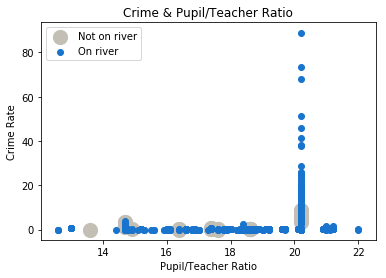

In [127]:
plt.xlabel('Pupil/Teacher Ratio')
plt.ylabel('Crime Rate')
x = plt.scatter(xbound, ybound, color='#c3bfb5', s=200)
y = plt.scatter(xunbound, yunbound, color='#1874cd')
plt.legend(handles=[x, y], labels=['Not on river', 'On river'])
plt.title('Crime & Pupil/Teacher Ratio')
plt.show()

Given that there is not a noteworthy difference in crime based on location or pupil/student ration, save approximately 20 student, I wonder if this is more an indicator of the fact that there is 20/1 ratio in most areas and therefore little data anywhere where this is not the case. 

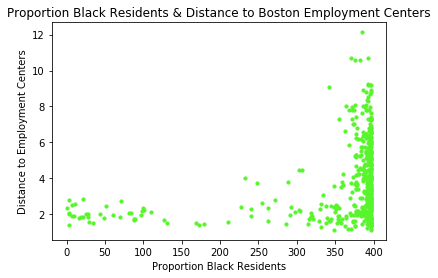

In [128]:
x = bostondata['B']
y = bostondata['DIS']
plt.scatter(x, y, color='#59f52c', s=10)
plt.xlabel('Proportion Black Residents')
plt.ylabel('Distance to Employment Centers')
plt.title('Proportion Black Residents & Distance to Boston Employment Centers')
plt.show()

It appears that there is a high concentration of black residents near Boston's employment centers and that the further out one goes the lower the proportion of black residents.

In [129]:
x_owneroccupied = bostondata['AGE']
y_nox = bostondata['NOX']
x_median = boston.target
y_indus = bostondata['INDUS']

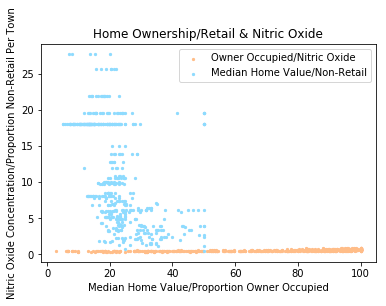

In [130]:
plt.xlabel('Median Home Value/Proportion Owner Occupied')
plt.ylabel('Nitric Oxide Concentration/Proportion Non-Retail Per Town')
x = plt.scatter(x_owneroccupied, y_nox, color='#ffbd88', s=5)
y = plt.scatter(x_median, y_indus, color='#8edbfe', s=5)
plt.legend(handles=[x, y], labels=['Owner Occupied/Nitric Oxide', 'Median Home Value/Non-Retail'])
plt.title('Home Ownership/Retail & Nitric Oxide')
plt.show()

For most home values there appears to be a relatively even spread of values regardless of non-retail proportion. It seems that one could infer that the concentration of non-retail space will not have a noticable effect on one's home value. Regarding owner occupied homes, there does appear to be a greater conentration of nitric oxide where the concentration of owner occupied homes are present. 

One question that I have is in regards to the crime rate in areas which are closer to radial highway systems. 
Below is a visualization of this data.

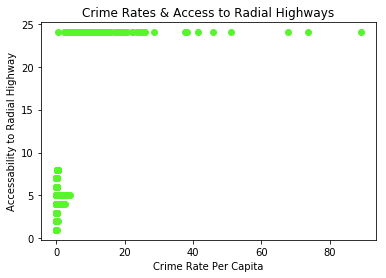

In [131]:
x = bostondata['CRIM']
y = bostondata['RAD']
plt.scatter(x, y, color='#59f52c')
plt.xlabel('Crime Rate Per Capita')
plt.ylabel('Accessability to Radial Highway')
plt.title('Crime Rates & Access to Radial Highways')
plt.show()

It appears that the areas with less access to radial highway systems have a consistently lower crime rate than area with closer access to highway systems. 